# Réseaux de neurones artificiels : Données du Titanic

Auteur : Fabrice LEBEL

Ce TP utilise TensorFlow et Keras pour prédire les survivants du Titanic.

TensorFlow : https://www.tensorflow.org

Keras : https://keras.io

## 1. Gestion des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

features = ["Pclass", "Sex", "Age"]
target = ["Survived"]

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

dic = {"Sex": {"female": 1, "male": 2}}
X_train.replace(to_replace=dic, inplace=True)
X_test.replace(to_replace=dic, inplace=True)

print("X_train:\n", X_train.head(), "\n")
print("y_train:\n", y_train.head(), "\n")
print("X_test:\n", X_test.head(), "\n")
print("y_test:\n", y_test.head(), "\n")

X_train:
    Pclass  Sex   Age
0       3    2  22.0
1       1    1  38.0
2       3    1  26.0
3       1    1  35.0
4       3    2  35.0 

y_train:
    Survived
0         0
1         1
2         1
3         1
4         0 

X_test:
    Pclass  Sex   Age
0       3    2   2.0
1       3    1  15.0
2       3    1  19.0
3       3    2   4.0
4       3    2  32.0 

y_test:
    Survived
0         0
1         1
2         1
3         0
4         1 



/home/fabrice/bin/anaconda3/envs/keras-gpu/lib/python3.7/site-packages/pandas/core/generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [3]:
# !!! Redimmensionnement pour TensorFlow !!!
(m, n) = X_train.shape
X_train = np.reshape(X_train.as_matrix(), (m,n))
(m, n) = y_train.shape
y_train = np.reshape(y_train.as_matrix(), (m,n))
(m, n) = X_test.shape
X_test = np.reshape(X_test.as_matrix(), (m,n))
(m, n) = y_test.shape
y_test = np.reshape(y_test.as_matrix(), (m,n))

print("X_train:" + str(X_train.shape))
print("y_train:" + str(y_train.shape))
print("X_test:" + str(X_test.shape))
print("y_test:" + str(y_test.shape))

X_train:(858, 3)
y_train:(858, 1)
X_test:(112, 3)
y_test:(112, 1)


/home/fabrice/bin/anaconda3/envs/keras-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/fabrice/bin/anaconda3/envs/keras-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/home/fabrice/bin/anaconda3/envs/keras-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/home/fabrice/bin/anaconda3/envs/keras-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [4]:
# Conversion des cibles en encodage one-hot
y_train_oh = to_categorical(y_train)
print("y_train:" + str(y_train_oh.shape))
y_test_oh = to_categorical(y_test)
print("y_test:" + str(y_test_oh.shape))

y_train:(858, 2)
y_test:(112, 2)


## 2. ANN avec TensorFlow

### 2.1 Création des placeholders

In [5]:
# Création des placeholders
def create_placeholders(n_features, n_targets):
    """
    Initialisation des placeholders de TensorFlow.
    
    Inputs:
    n_features: nombre de variables dépendantes
    n_targets: nombre de cibles ou modalités
    
    Outputs:
    Placeholders pour la matrice des variables X et celle des cibles Y
    """
    X = tf.placeholder(dtype=tf.float32, shape=(None, n_features))
    Y = tf.placeholder(dtype=tf.float32, shape=(None, n_targets))
    return X, Y

In [6]:
n_features = 3 # nombre de variables en entrée
n_targets = 2 # nombre de classes
x,y = create_placeholders(n_features, n_targets)
print("X = " + str(x))
print("Y = " + str(y))

X = Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 2), dtype=float32)


### 2.2 Initialisation des paramètres

In [7]:
def initialize_parameters(n_features, n_hidden_1, n_hidden_2, n_targets):
    """
    Initalisation des matrices de poids des couches cachée et de sortie.
    
    Inputs:
    n_features: nombre de neuronnes en entrée
    n_hidden_1: nombre de neuronnes de la première couche cachée
    n_hidden_2: nombre de neuronnes de la seconde couche cachée
    n_targets: nombre de neuronnes de la couche de sortie
    
    Outputs:
    Matrices des poids initialisées
    """
    # Matrices des poids
    parameters = {
        'W1': tf.Variable(tf.random_normal([n_features, n_hidden_1],
                                           stddev=0.1), tf.float32),
        'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2],
                                           stddev=0.1), tf.float32),
        'O': tf.Variable(tf.random_normal([n_hidden_2, n_targets],
                                          stddev=0.1), tf.float32)
    }
    return parameters

In [8]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters(n_features=3, n_hidden_1=5,
                                       n_hidden_2=3, n_targets=2)
    init = tf.global_variables_initializer()
    
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()))
    print("W2 = " + str(parameters["W2"].eval()))
    print("OUT = " + str(parameters["O"].eval()))

Instructions for updating:
Colocations handled automatically by placer.
W1 = [[ 0.09670158  0.14783667 -0.03817277  0.12951288  0.06188327]
 [-0.0801613  -0.11046389  0.01358366 -0.1187761  -0.00936709]
 [ 0.14333381  0.10890345  0.02519312 -0.06273121  0.02448818]]
W2 = [[-0.0832518  -0.20191519 -0.02170038]
 [-0.07315662  0.05014588  0.0367959 ]
 [-0.05531291  0.01290695 -0.11398597]
 [ 0.01994242 -0.16987596  0.05647318]
 [-0.03577564  0.16666175  0.21454255]]
OUT = [[-0.02226912 -0.01898699]
 [ 0.03459689  0.14837329]
 [-0.0110685  -0.09493911]]


### 2.3 Propagation en avant ('forward propagation')

In [9]:
def forward_propagation(x, parameters):
    """
    Etape de propagation vers l'avant des signaux.
    
    Inputs:
    x: vecteur de variables indépendantes
    parameters: Matrice des poids synaptiques
    
    Outputs:
    Prédiction y_hat
    """
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    O = parameters["O"]
    
    Z1 = tf.matmul(x,W1)
    A1 = tf.nn.sigmoid(Z1)
    
    Z2 = tf.matmul(A1,W2)
    A2 = tf.nn.sigmoid(Z2)
    
    #y_hat = tf.nn.sigmoid(tf.matmul(A2, O))
    y_hat = tf.matmul(A2, O)
    return y_hat

In [10]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(123)
    x,y = create_placeholders(n_features=3, n_targets=2)
    parameters = initialize_parameters(n_features=3, n_hidden_1=10,
                                       n_hidden_2=3, n_targets=2)
    y_hat = forward_propagation(x, parameters)
    
    init = tf.global_variables_initializer()
    sess.run(init)
    res = sess.run(y_hat,
                   feed_dict={x: np.reshape(X_train[0], [1,3]),
                              y: np.reshape(y_train_oh[0], [1,2])})
    print("y_hat = " + str(res))

y_hat = [[0.18242426 0.02923854]]


### 2.4 Calcul du coût

In [11]:
def compute_cost(y_hat, y):
    """
    Inputs:
    y_hat : sortie de la propagation en avant
    y : vraies valeurs de la cible
    
    Outputs:
    Le coût
    """
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_hat))
    #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=y_hat))
    #cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_hat), reduction_indices=[1]))
    return cost

In [12]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(123)
    x,y = create_placeholders(n_features=3, n_targets=2)
    parameters = initialize_parameters(n_features=3, n_hidden_1=10,
                                       n_hidden_2=3, n_targets=2)
    y_hat = forward_propagation(x, parameters)
    cost = compute_cost(y_hat, y)
    
    init = tf.global_variables_initializer()
    sess.run(init)
    res = sess.run(cost,feed_dict={x: np.reshape(X_train[0], [1,3]),
                                   y: np.reshape(y_train_oh[0], [1,2])})
    print("cost = " + str(res))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = 0.75890756


### 2.5 Modèle

In [13]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.009,
          num_epochs=100, print_cost=True):
    """
    Modèle complet avec 2 couches cachées et calcul des précisions.
    
    Inputs:
    X_train: matrice des variables indépendantes
    Y_train: matrice des cibles
    X_test: matrice des variables indépendantes
    Y_test: matrice des cibles
    learning_rate: facteur d'apprentissage
    num_epochs: nombre de présentation de l'échantillon (époque)
    print_cost: drapeau d'affichage des coûts toutes les 100 époques
    
    Outputs:
    train_accuracy: précision sur l'échantillon d'entrainement
    test_accuracy: précision sur l'échantillon de test
    parameters: matrices de poids
    """
    
    ops.reset_default_graph()
    tf.set_random_seed(123)
    (m,n) = X_train.shape
    n_y = Y_train.shape[1]
    costs = [] # Liste des coûts
    
    # Graphe des actions
    # ------------------
    X, Y = create_placeholders(n_features=n, n_targets=n_y)
    parameters = initialize_parameters(n_features=n, n_hidden_1=100,
                                       n_hidden_2=100, n_targets=n_y)
    # Etape feed-forward
    Y_hat = forward_propagation(X, parameters)
    predict = tf.argmax(Y_hat, axis=1)
    cost = compute_cost(Y_hat, Y)
    # Etape de rétropropagation du gradient (backpropagation)
    optimizer = tf.train.GradientDescentOptimizer(
        learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    # Lancement de la  session
    with tf.Session() as sess:
        # Intitialisation
        sess.run(init)
        
        # Boucle de présentations multiples de l'échantillon d'entrainement
        for epoch in range(num_epochs):
            epoch_cost = 0
            # Boucle de présentation d'une observation
            for i in range(m):
                tmp_X = np.reshape(X_train[i], [1,n])
                tmp_Y = np.reshape(Y_train[i], [1,2])
                _, tmp_cost, tmp_y_hat = sess.run([optimizer, cost, Y_hat],
                                                  feed_dict={X: tmp_X, 
                                                             Y: tmp_Y})
                epoch_cost += tmp_cost
                
            epoch_cost = epoch_cost / m
                
            # Affichage du coût après chaque epoque
            if print_cost == True and epoch %5 == 0:
                print("Cost after epoch {0}: {1}".format(epoch, epoch_cost))
            if print_cost == True and epoch %1 == 0:
                costs.append(epoch_cost)
                
        # Affichage du coût
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations')
        plt.title('Learning rate =' + str(learning_rate))
        plt.show()
    
        # Calcul des prédictions
        prediction = tf.argmax(Y_hat, 1)
        correct_prediction = tf.equal(prediction, tf.argmax(Y, 1))
        print(correct_prediction)
    
        # Calcul des précisions sur les échantillons d'entrainement
        # et de test
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy: {0}%".format(train_accuracy * 100))
        print(" Test Accuracy: {0}%".format(test_accuracy * 100))
                
        return train_accuracy, test_accuracy, parameters    

Cost after epoch 0: 0.7003060923520223
Cost after epoch 5: 0.669935632731531
Cost after epoch 10: 0.6472517368850452
Cost after epoch 15: 0.6186082719158738
Cost after epoch 20: 0.5909052368097164
Cost after epoch 25: 0.5697982808865937
Cost after epoch 30: 0.5538556497318275
Cost after epoch 35: 0.5405267758212445
Cost after epoch 40: 0.5299833982657546
Cost after epoch 45: 0.5218451342421707
Cost after epoch 50: 0.5153819902415772
Cost after epoch 55: 0.5102940854792307
Cost after epoch 60: 0.5061984745137575
Cost after epoch 65: 0.502708973646889
Cost after epoch 70: 0.4997015494141198
Cost after epoch 75: 0.4970529077043822
Cost after epoch 80: 0.49466627192334
Cost after epoch 85: 0.49254502898048486
Cost after epoch 90: 0.49097078448158227
Cost after epoch 95: 0.48948101868602234
Cost after epoch 100: 0.48798822982389795
Cost after epoch 105: 0.4865290617056317
Cost after epoch 110: 0.48516738019060857
Cost after epoch 115: 0.48398101594831494
Cost after epoch 120: 0.482693514046

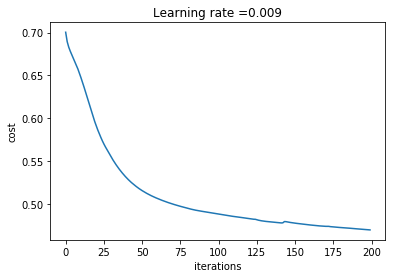

Tensor("Equal:0", shape=(?,), dtype=bool)
Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 81.46852850914001%
 Test Accuracy: 79.46428656578064%


(0.8146853,
 0.79464287,
 {'W1': <tf.Variable 'Variable:0' shape=(3, 100) dtype=float32_ref>,
  'W2': <tf.Variable 'Variable_1:0' shape=(100, 100) dtype=float32_ref>,
  'O': <tf.Variable 'Variable_2:0' shape=(100, 2) dtype=float32_ref>})

In [14]:
model(X_train, y_train_oh, X_test, y_test_oh, num_epochs=200)

## ANN avec Keras

In [15]:
import keras as keras
from keras.models import Sequential

### Création et entrainement du modèle

In [16]:
model = Sequential()

In [17]:
from keras.layers import Dense
model.add(Dense(units=50, activation='relu', input_dim=3))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd', metrics=['accuracy'])
#model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.SGD(lr=0.009, momentum=0.9, nesterov=True),
#              metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train_oh, epochs=20, batch_size=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
858/858 [==============================] - 1s 587us/step - loss: 0.7657 - acc: 0.5618
Epoch 2/20
858/858 [==============================] - 0s 384us/step - loss: 0.6500 - acc: 0.6154
Epoch 3/20
858/858 [==============================] - 0s 383us/step - loss: 0.6357 - acc: 0.6445
Epoch 4/20
858/858 [==============================] - 0s 411us/step - loss: 0.6180 - acc: 0.6550
Epoch 5/20
858/858 [==============================] - 0s 380us/step - loss: 0.6162 - acc: 0.6702
Epoch 6/20
858/858 [==============================] - 0s 375us/step - loss: 0.6048 - acc: 0.6690
Epoch 7/20
858/858 [==============================] - 0s 379us/step - loss: 0.6190 - acc: 0.6667
Epoch 8/20
858/858 [==============================] - 0s 391us/step - loss: 0.6031 - acc: 0.6690
Epoch 9/20
858/858 [==============================] - 0s 381us/step - loss: 0.6143 - acc: 0.6713
Epoch 10/20
858/858 [==============================] - 0s 384us/step - loss: 0.

### Performances

In [20]:
loss_and_metrics = model.evaluate(X_test, y_test_oh, batch_size=128)
print(loss_and_metrics)

112/112 [==============================] - 0s 457us/step
[0.7057503461837769, 0.6339285969734192]
